# Problem Solving with Ensembles Methodlogy :
---
<i> Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.</i>

<center><img alt="Machine Learning - Ensemble Methods" class="n3VNCb" src="https://image.slidesharecdn.com/mlensemblemethods-170920123226/95/machine-learning-ensemble-methods-6-638.jpg?cb=1505910875" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 700px; height: 450px; margin: 0px;"></center>


<b> Few techniques to perform ensemble decision trees :    
### 1.  [Bagging (Bootstrap Agrregation) :](#tree1)<br> 
<i> Bagging, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.</i>
### 2.  [Random Forests :](#tree2)<br>
<i> Random Forest is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees.</i>
### 3.  [Boosting (Gradient Boosting Technique) :](#tree3)<br>
<i> Boosting, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy and Gradient Boosting is an extension over boosting method.</i>

# Library :

In [145]:
library(randomForest) 
library(gbm)
library(tidyverse)
library(data.table)
library(funModeling)
library(dplyr)
library(repr)    # --- To resize the plots area
library(caTools) # --- Sample splitting
library(caret)   # --- Confusion matrix
library(MASS)    # --- For Boston data set
library(ggplot2)

### Data Set : The Boston Housing Dataset
<i> This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases and 14 columns. Data description is present at <a href = https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html > The Boston Housing Dataset</i>
    
We will predict the median value of owner-occupied homes with the help of the decision tree Regression model.

    
### Features Informations :
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per (10,000 dollar)
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [146]:
# Loading the Boston data set present in the MASS library :
data = Boston

# Top rows of the data :
head(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [147]:
# Summary of the data :
summary(data)

# Status of the data and variables :
funModeling::status(data)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>
crim,0,0.0000000,0,0,0,0,numeric,504
zn,372,0.7351779,0,0,0,0,numeric,26
indus,0,0.0000000,0,0,0,0,numeric,76
chas,471,0.9308300,0,0,0,0,integer,2
nox,0,0.0000000,0,0,0,0,numeric,81
rm,0,0.0000000,0,0,0,0,numeric,446
age,0,0.0000000,0,0,0,0,numeric,356
dis,0,0.0000000,0,0,0,0,numeric,412
rad,0,0.0000000,0,0,0,0,integer,9


In [148]:
# Stting the seeds
set.seed(1)

# Splitting the data into the trainnig and testing part :
train_ind = caTools::sample.split(data,SplitRatio = 2/3)

# Train and test data set :
train_data = data[train_ind,]
train_y = train_data$medv
print("Training data Set :");print(dim(train_data))
test_data = data[!train_ind,]
test_y = test_data$medv
print("Testing data Set :");print(dim(test_data))

[1] "Training data Set :"
[1] 326  14
[1] "Testing data Set :"
[1] 180  14


<a id = "tree1"></a><br>
# 1. Bagging Technique:

In [149]:
set.seed(1)

# Bagging Modeling on the data set
model_bag = randomForest::randomForest(medv ~., data = train_data,mtry = 13,importance = TRUE)
model_bag

# Prediction on test data set 
test_pred = predict(model_bag,newdata = test_data)

# Model performance on test data set
RMSE_bag = caret::RMSE(test_pred,test_y)
print(paste("RMSE on the test data :",round(RMSE_bag,4)))

# Variables importance
randomForest::importance(model_bag)


Call:
 randomForest(formula = medv ~ ., data = train_data, mtry = 13,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 13.65106
                    % Var explained: 84.22

[1] "RMSE on the test data : 3.5667"


,%IncMSE,IncNodePurity
crim,16.3374922,1361.89913
zn,2.4600595,25.58371
indus,9.7317219,221.56182
chas,0.3966072,15.67332
nox,14.7636697,438.34684
rm,55.8029795,13296.81695
age,13.4147544,341.34239
dis,17.5287077,1113.58883
rad,6.3148181,117.99573
tax,12.1244006,485.67544


<i> Here,the argument mtry = 13 indicates that all 13 predictors should be considered for each split of the tree or bagging sould be done. After appliing the Bagging technique on the training data set and checking its performance on the testing data set, we are getting around 3.5667 Root mean square error and on trainnig the mean of squared residuals is 13.65106.</i>

<i> For the features importance we are having two metric to rank-order them, first is %IncMSE which means if any features will be dropped from the model then we get mean decrease of accuracy in predictions, (the values associated with it) and second one measure of the total decrease in node impurity that results from splits over that variable, averaged over all trees and it is measured by the training RSS.
    
### Visualization : For actual v/s predicted response and for features importance

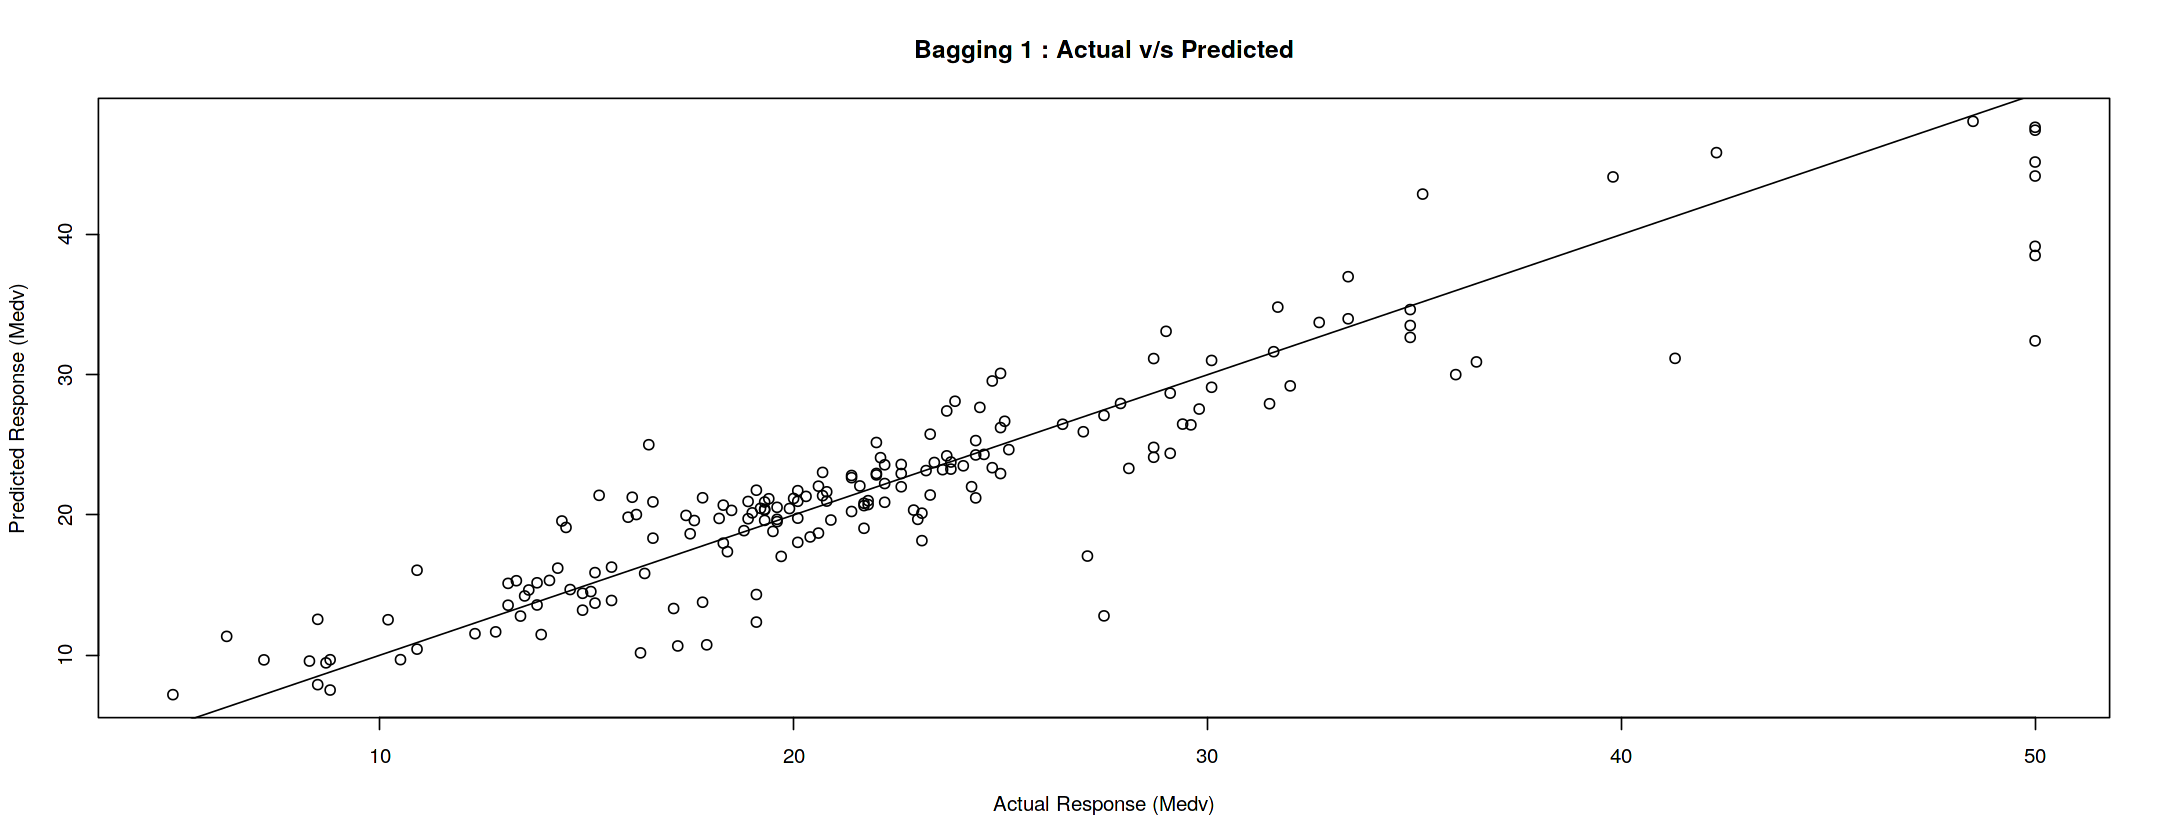

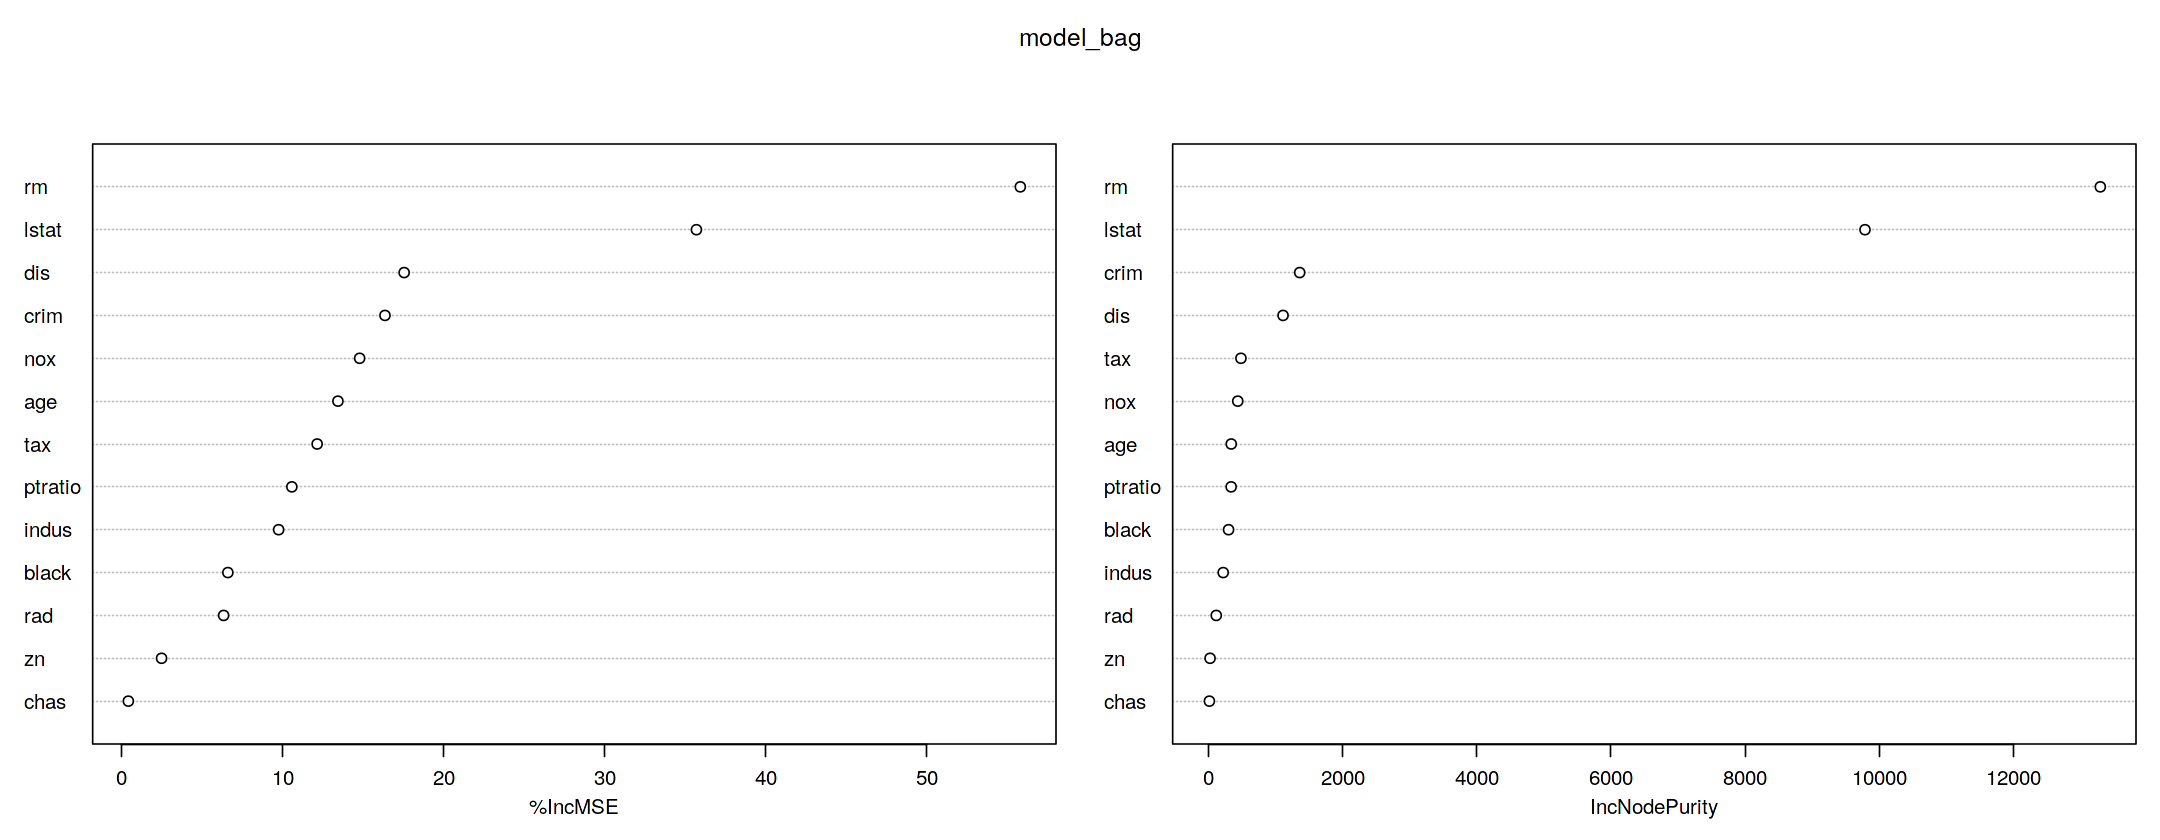

In [150]:
# Resizing the chart area
options(repr.plot.width = 18,repr.plot.height = 7)

# Plotting the fitted response var V/s actual
plot(test_y,test_pred,xlab = 'Actual Response (Medv)',ylab = 'Predicted Response (Medv)',main = "Bagging 1 : Actual v/s Predicted")
abline(0,1)

# Features importance plots
randomForest::varImpPlot(model_bag,sort = TRUE)

<i> In above plots, we are having the scattered plot for actual and prediction on the test data set and which gives the idea of prediction points. And second and third plots are for the features importance and from the observation on this graphs, the wealth level of community (lstat) and the house size (rm) are by far two most important variables.</i>

### Let's see, what will happen if we change the ntree (no of trees) parameter value

In [151]:
set.seed(1)
# Bagging Model with restriction on the no of trees
model_bag1 = randomForest::randomForest(medv ~.,data = train_data,mtry = 13,ntree = 25,importance = TRUE)
model_bag1

# Prediction on test data set 
test_pred1 = predict(model_bag1,newdata = test_data)

# Model performance on test data set
RMSE_bag1 = caret::RMSE(test_pred1,test_y)
print(paste("RMSE on the test data :",round(RMSE_bag1,4)))

# Variables importance
randomForest::importance(model_bag1)


Call:
 randomForest(formula = medv ~ ., data = train_data, mtry = 13,      ntree = 25, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 25
No. of variables tried at each split: 13

          Mean of squared residuals: 15.21899
                    % Var explained: 82.4

[1] "RMSE on the test data : 3.6864"


,%IncMSE,IncNodePurity
crim,3.763617,1213.315594
zn,2.027465,13.749339
indus,1.215707,232.452519
chas,1.164081,4.251858
nox,4.266414,492.407429
rm,12.828829,14092.636175
age,2.623140,341.486398
dis,3.539628,1363.567695
rad,1.724416,111.826766
tax,6.025188,300.306742


<i> After changing the ntree parameter values i.e. if we take the no of trees as 25, then its causing some changes in results metric and it means having significant increase in ntree values will leads to good performance of the model and produce lesser RMS.</i>

### Visualization : Predicted v/s Actual and Features importance

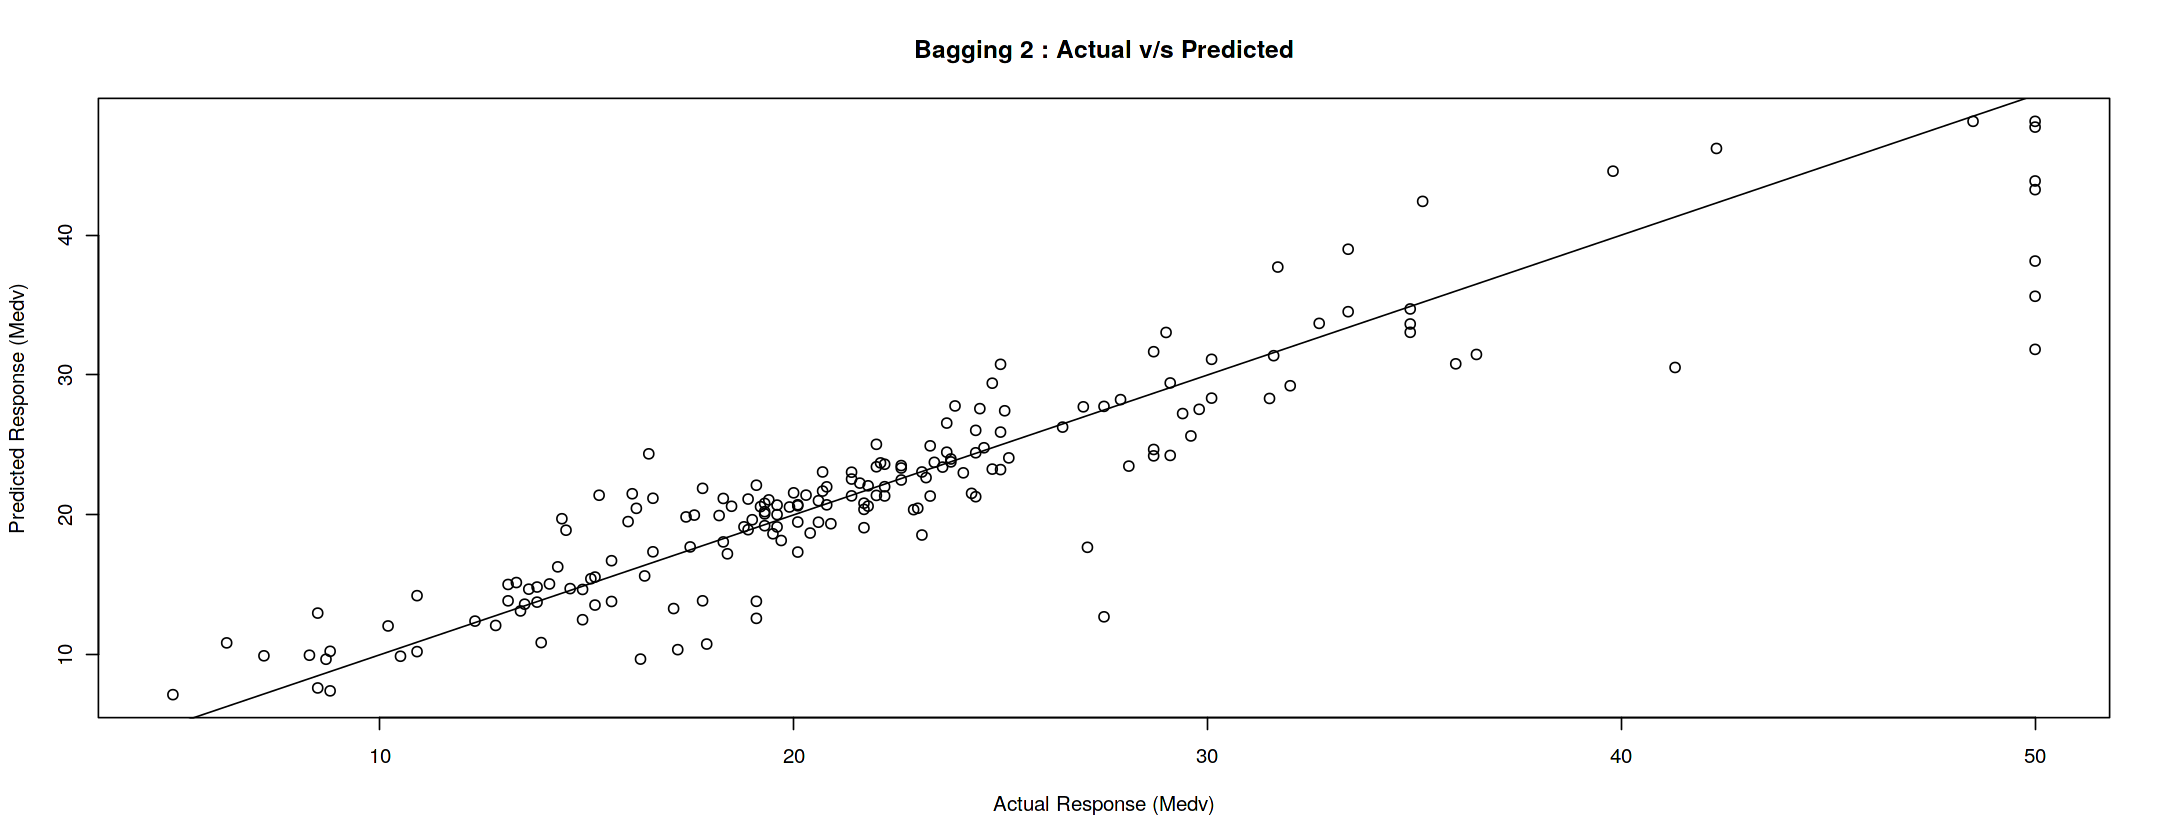

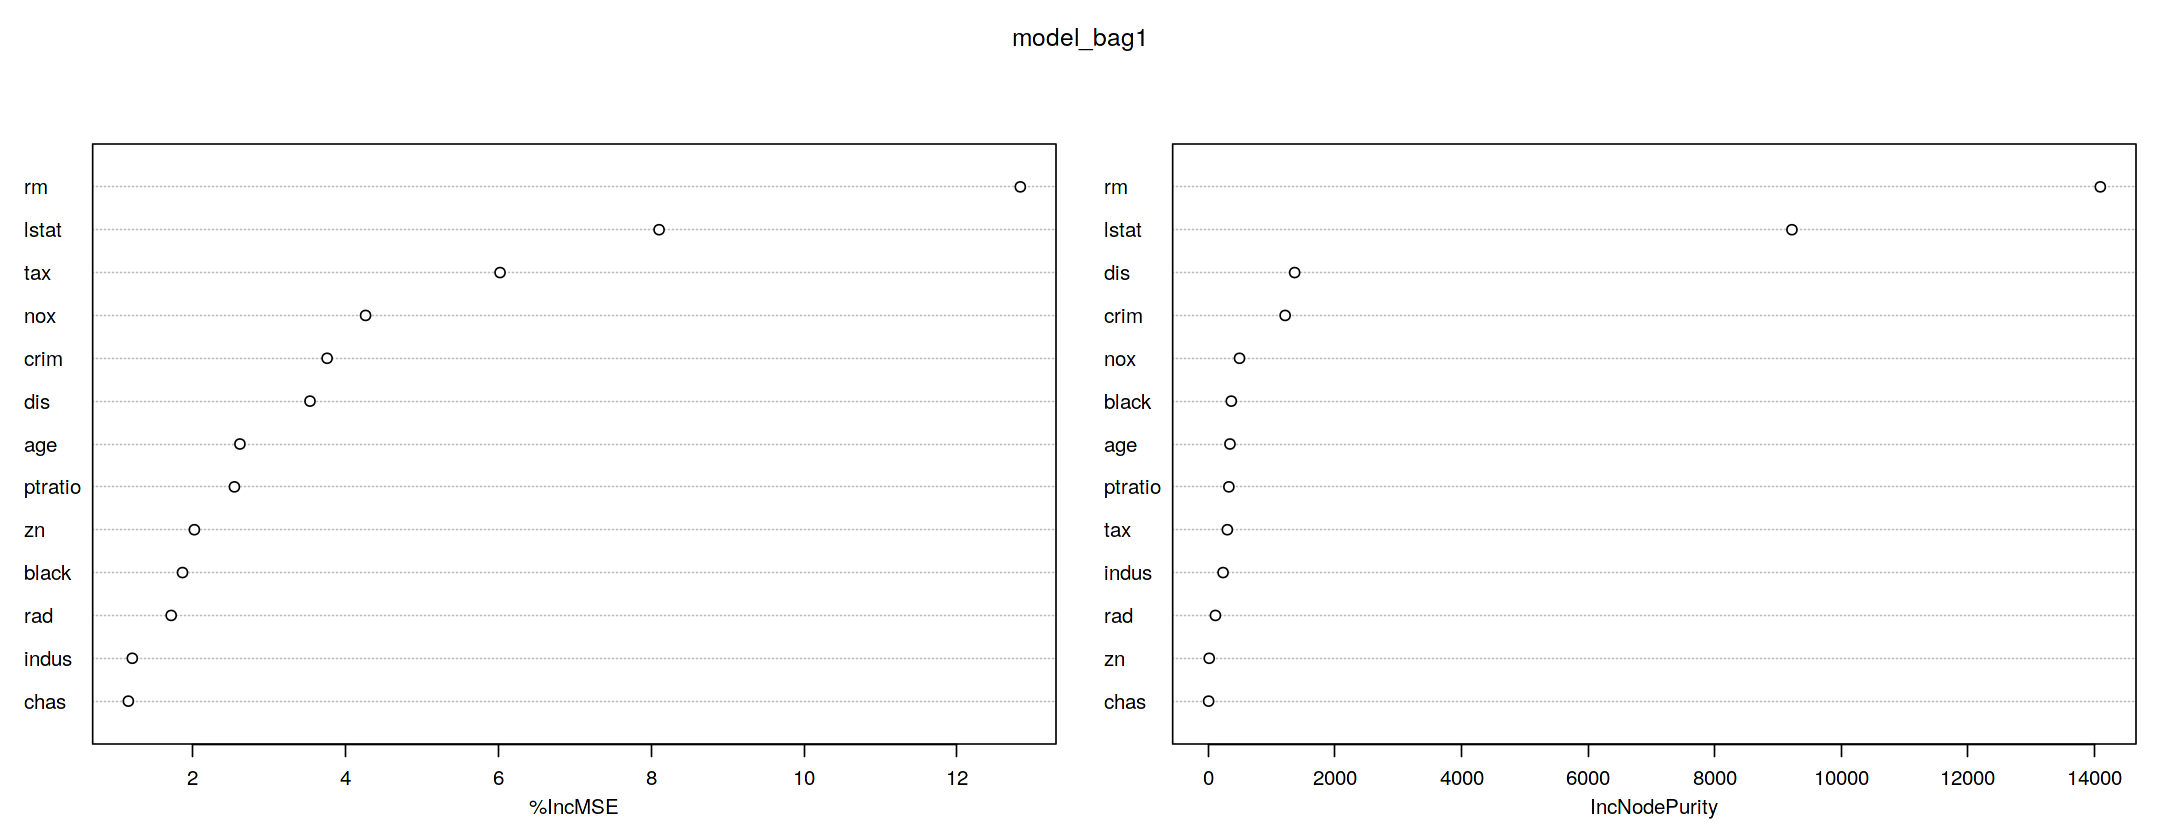

In [152]:
# Resizing the chart area
options(repr.plot.width = 18,repr.plot.height = 7)

# Plotting the fitted response var V/s actual
plot(test_y,test_pred1,xlab = 'Actual Response (Medv)',ylab = 'Predicted Response (Medv)',main = "Bagging 2 : Actual v/s Predicted")
abline(0,1)

# Features importance plots
randomForest::varImpPlot(model_bag1)

![](http://)<i> From above feature importance plot, we have same inference about the variables except the magnitude of the values associated with them has changed little bit.</i>

<a id = "tree2"></a><br>
# 2. Random Forests Technique:

In [153]:
set.seed(1)

# Random Forest Modeling on training data set
model_rf = randomForest::randomForest(medv~., data = train_data,mtry = 6,importance = TRUE)
model_rf

# Prediction on test data set 
test_pred_rf = predict(model_rf,newdata = test_data)

# Model performance on test data set
RMSE_rf = caret::RMSE(test_pred_rf,test_y)
print(paste("RMSE on the test data :",round(RMSE_rf,4)))

# Variables importance
randomForest::importance(model_rf)


Call:
 randomForest(formula = medv ~ ., data = train_data, mtry = 6,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 12.907
                    % Var explained: 85.08

[1] "RMSE on the test data : 3.5125"


,%IncMSE,IncNodePurity
crim,14.611018,1687.74270
zn,2.313854,96.41363
indus,9.719141,1638.28338
chas,1.567020,85.61803
nox,13.461025,1004.24181
rm,40.146727,10308.01791
age,10.140926,614.35344
dis,14.727021,1354.30471
rad,4.837318,152.08173
tax,11.738242,678.91649


<i> Here, the values of the mtry is 6 (by default it takes p/3) which means we are taking the random forest approach with subset of the features. And here we are getting,lesser RMSE on test i.e. 3.5125 and this indicates that random forest yielded an improvement over bagging technique in this case.</i>

### Visualization : For actual v/s predicted response and for features importance

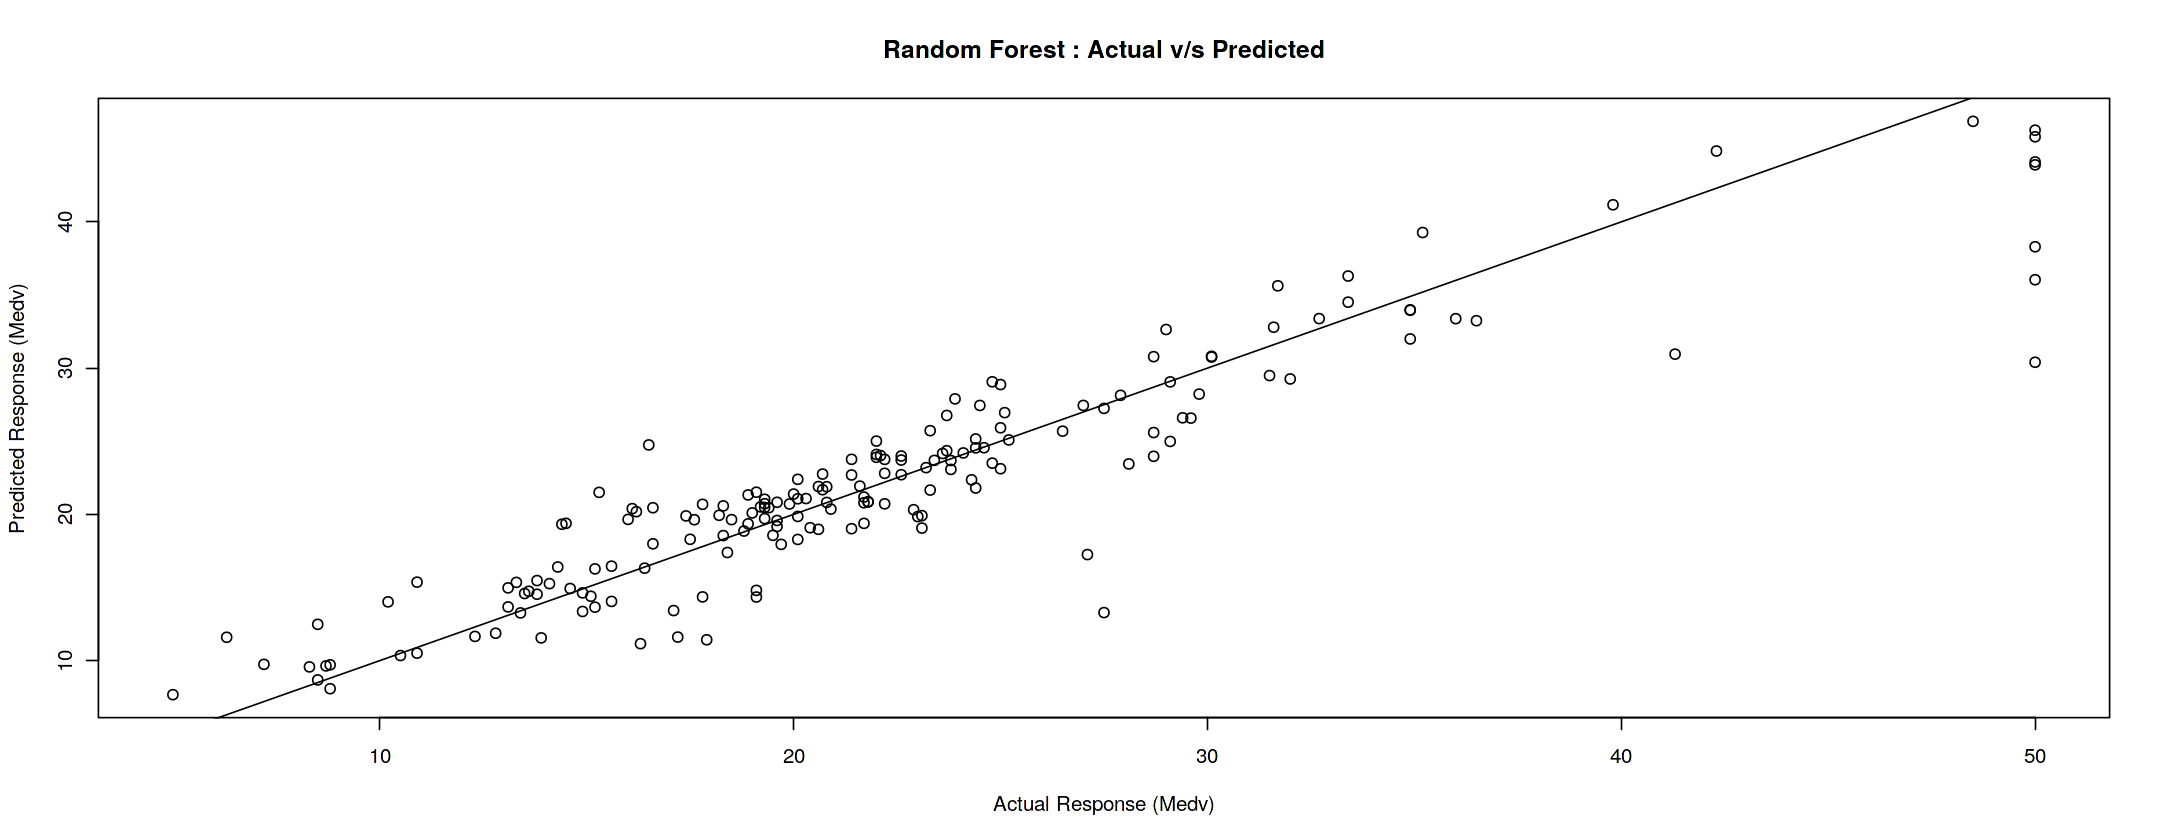

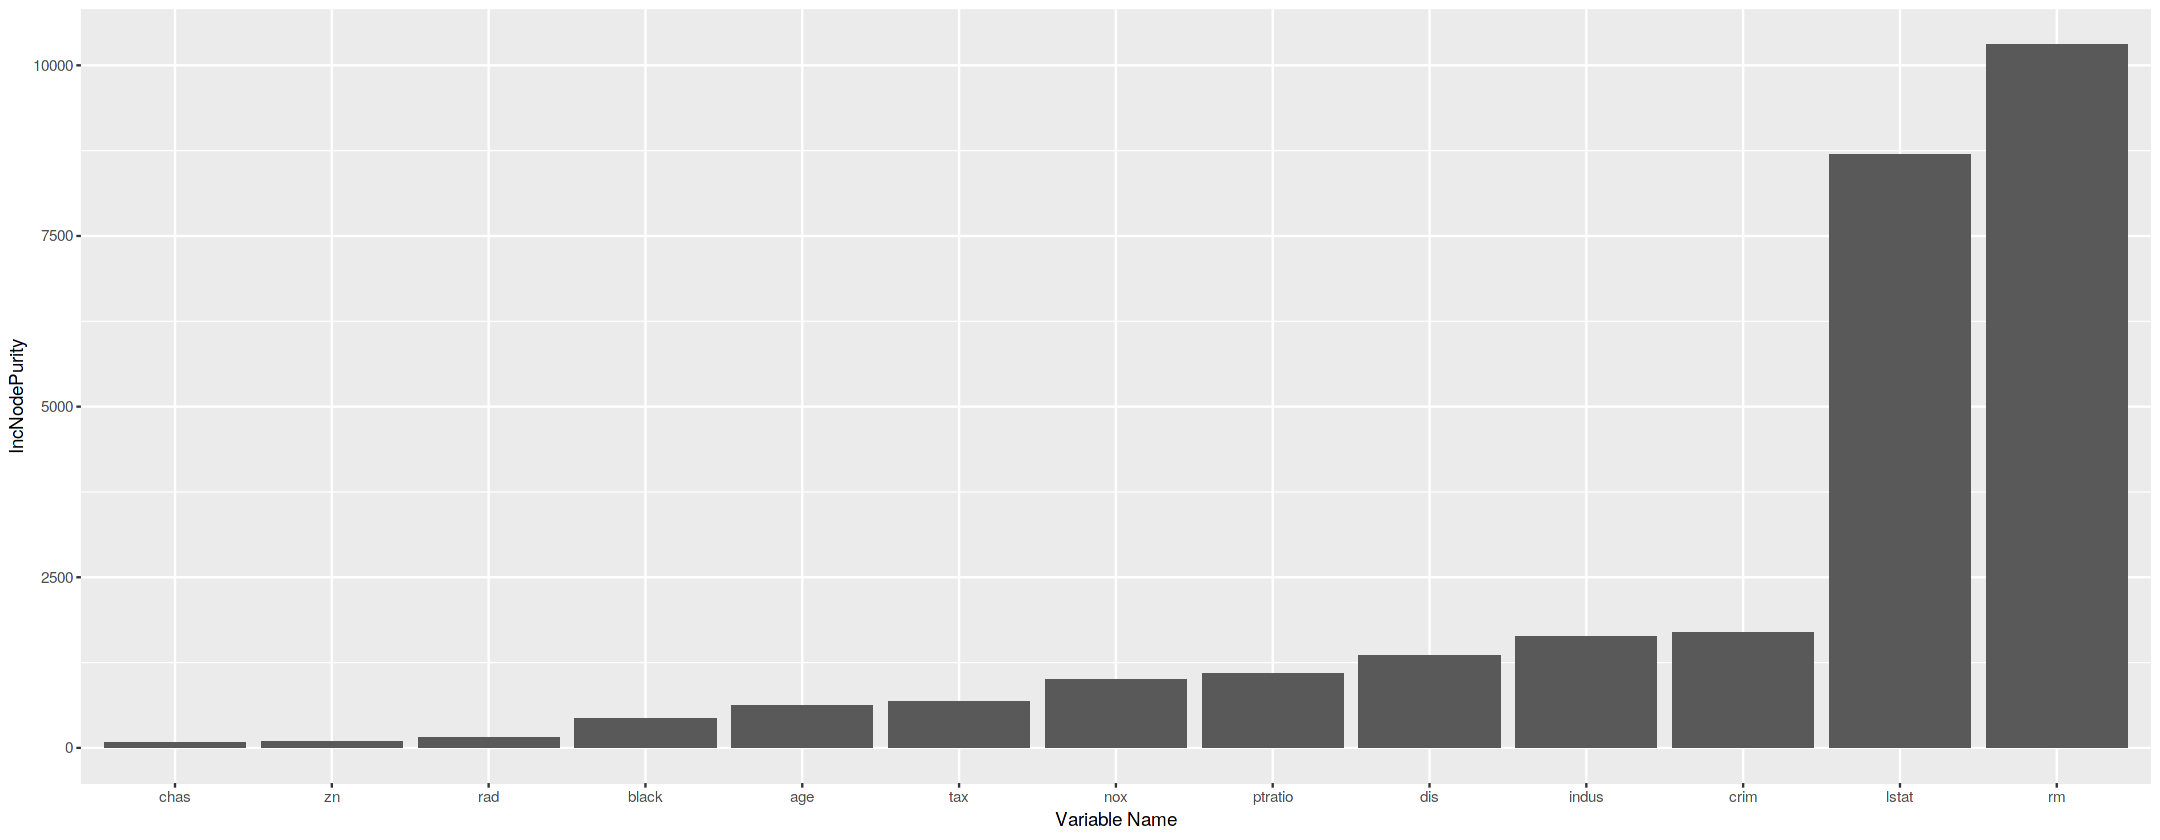

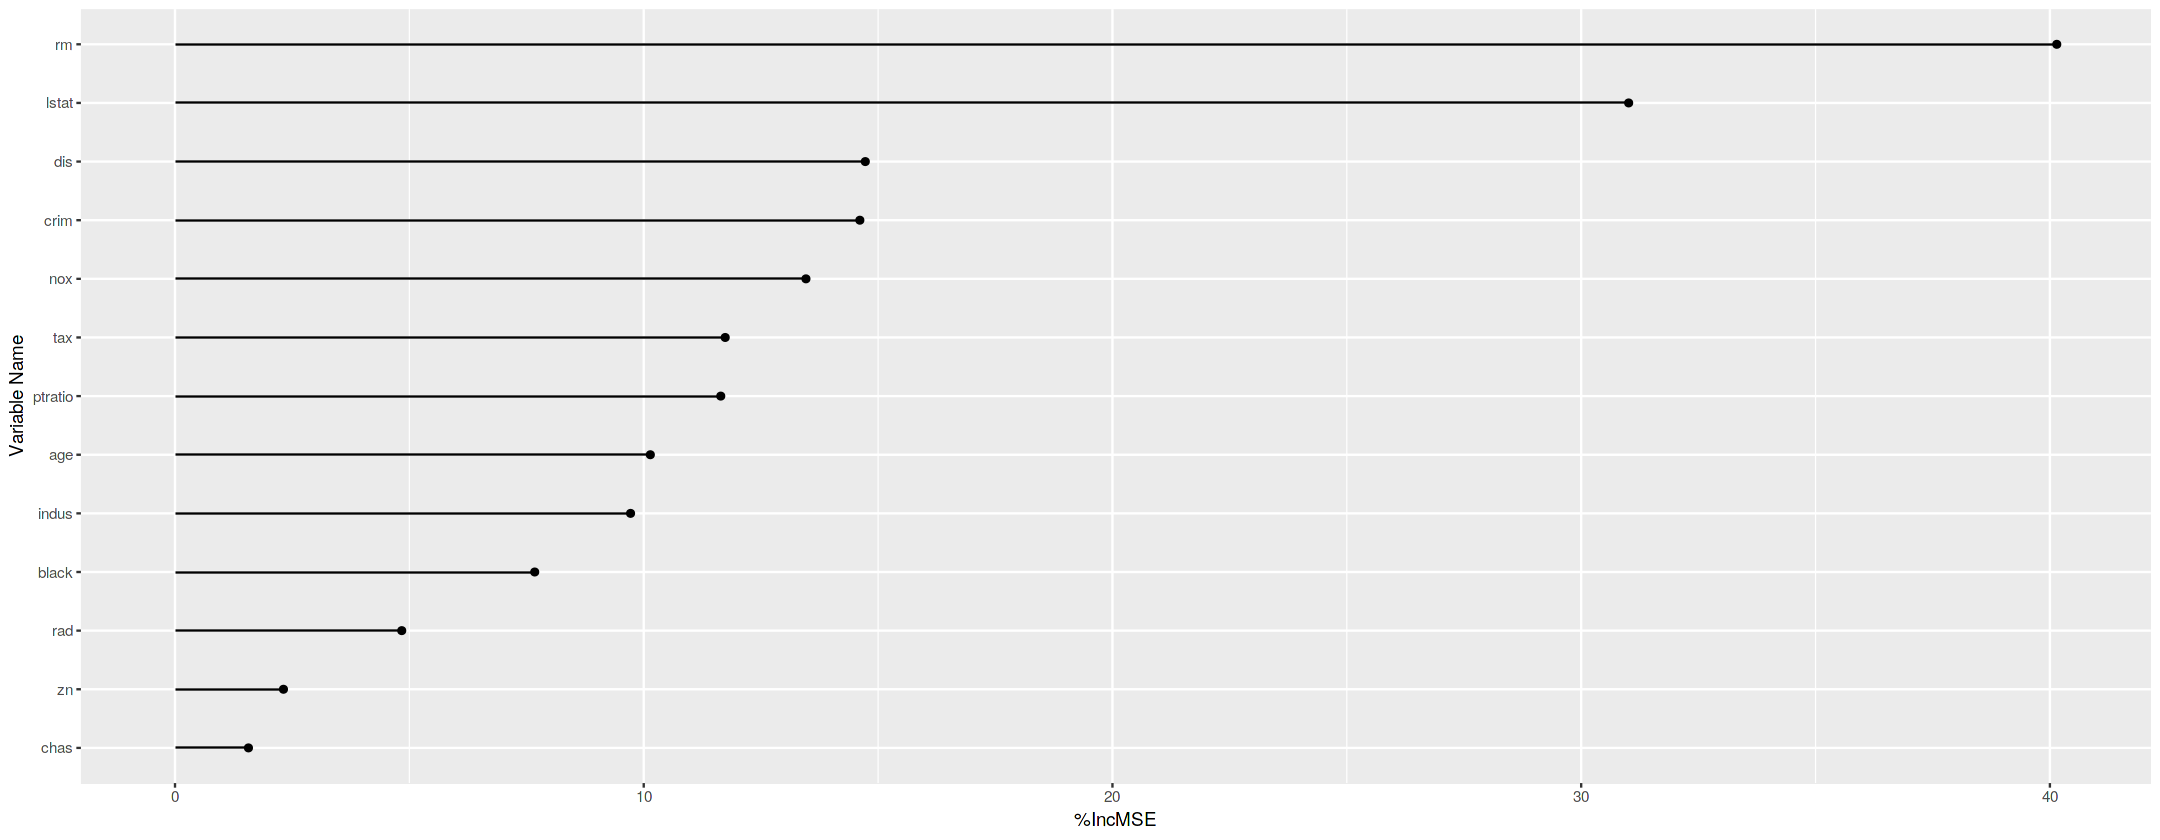

In [154]:
# Resizing the chart area
options(repr.plot.width = 18,repr.plot.height = 7)

# Plotting the fitted response var V/s actual
plot(test_y,test_pred_rf,xlab = 'Actual Response (Medv)',ylab = 'Predicted Response (Medv)',main = "Random Forest : Actual v/s Predicted")
abline(0,1)

# Features importance plots
imp <- randomForest::importance(model_rf)
imp <- as.data.frame(imp)
imp$varnames <- rownames(imp) # row names to column
rownames(imp) <- NULL  
 
ggplot(imp, aes(x=reorder(varnames, IncNodePurity), weight=IncNodePurity)) + 
  geom_bar() +
  scale_fill_discrete(name="Variable Group") +
  ylab("IncNodePurity") +
  xlab("Variable Name")

ggplot(imp, aes(x=reorder(varnames,`%IncMSE`), y=`%IncMSE`)) + 
  geom_point() +
  geom_segment(aes(x=varnames,xend=varnames,y=0,yend=`%IncMSE`)) +
  scale_color_discrete(name="Variable Group") +
  ylab("%IncMSE") +
  xlab("Variable Name") +
  coord_flip()

<i> From above charts, the order of impartant variables based on IncNodePurity and %IncMSE values is simply visible.</i>

<a id = "tree3"></a><br>
# 3. Boosting Technique (Gradient Boosting Model):

[1] "RMSE on the test data : 3.467"


,var,rel.inf
,<fct>,<dbl>
lstat,lstat,37.5755619
rm,rm,30.5237030
dis,dis,8.2057548
crim,crim,6.8639024
black,black,3.2150892
nox,nox,2.9083017
age,age,2.7599171
tax,tax,2.1559286
ptratio,ptratio,2.0605258


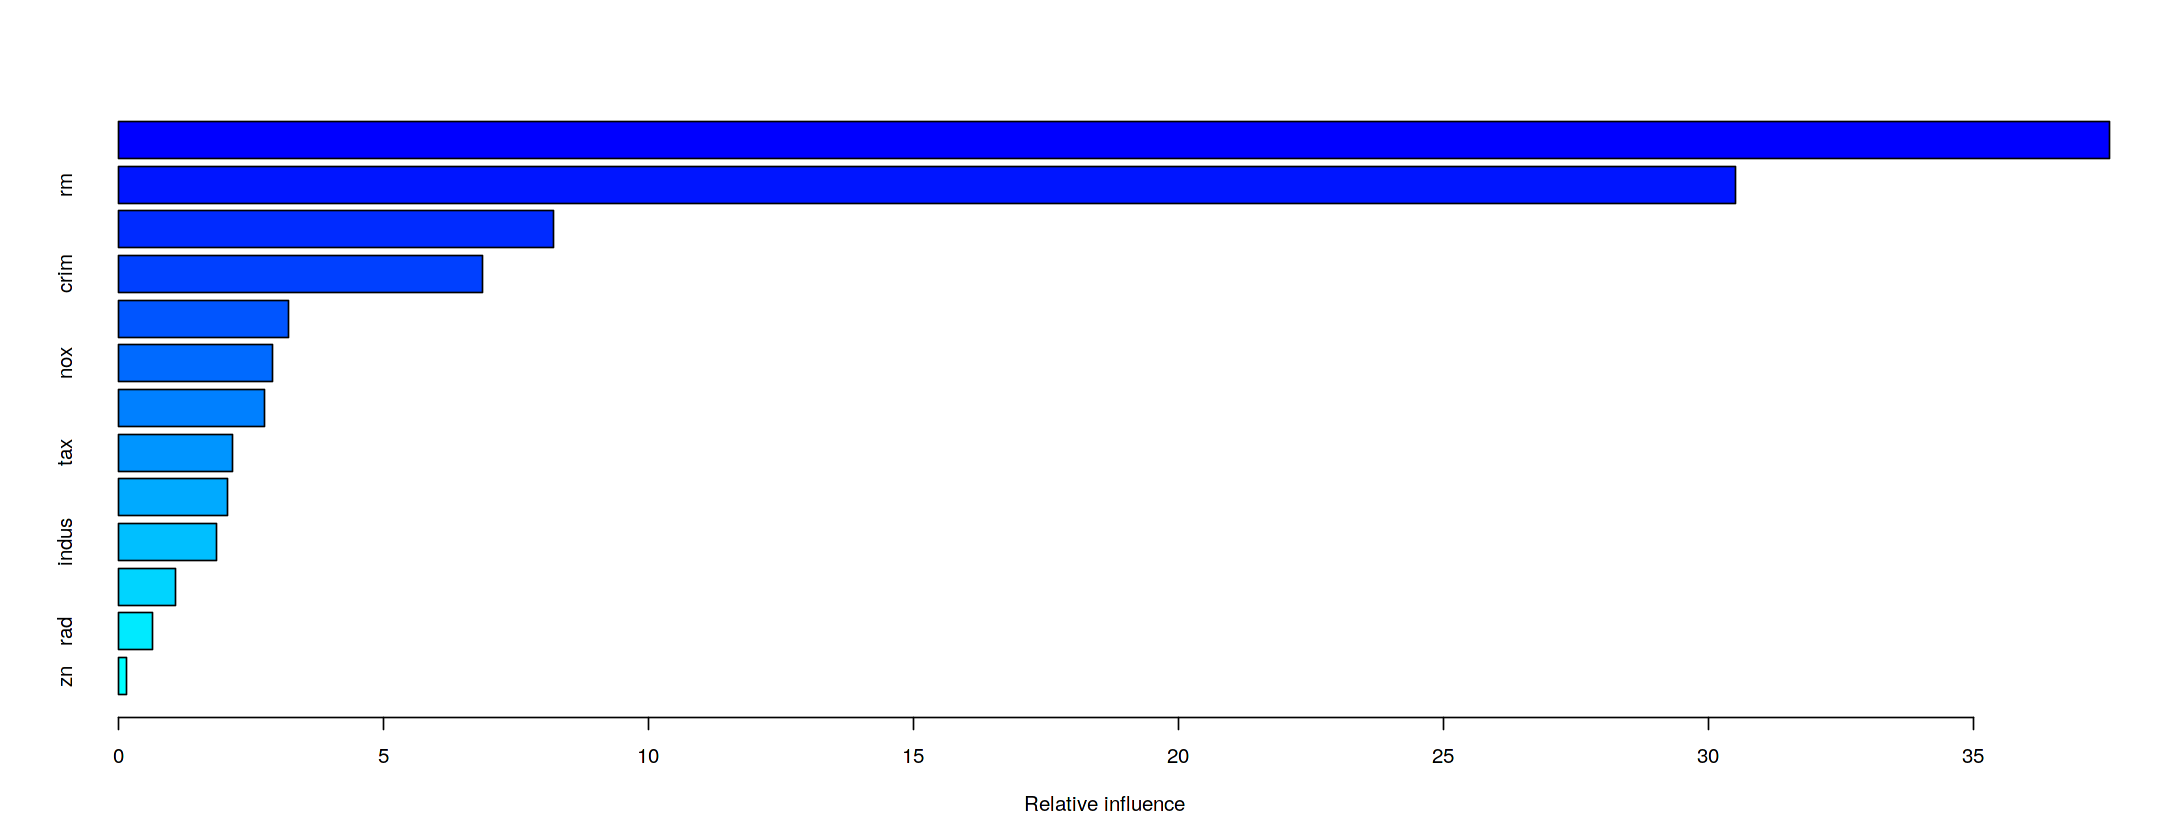

In [155]:
set.seed(1)

# Boosting modeling on the training data set
model_gbm = gbm(medv ~.,data = train_data,distribution = 'gaussian',
                 n.trees = 5000,interaction.depth =4)

# Prediction on test data set 
test_pred_gbm = predict(model_gbm,newdata = test_data,n.trees = 5000)

# Model performance on test data set
RMSE_gbm = caret::RMSE(test_pred_gbm,test_y)
print(paste("RMSE on the test data :",round(RMSE_gbm,4)))

# Features Relative information
summary(model_gbm)

<i> Here, we are using the parameter as ditribution = "gaussian" ( since this is a regression problem), n.trees = 5000 (by default it is 100) and limit of depth of each tree i.e. interaction.depth = 4. And after applying this we are getting RMSE lesser to the RF and bagging in this cases. Also for the relevent information of variables, we are having most significant variables in order of magnitude, higher the value more significant variable. And the results indicating that lstat and rm are most sinificant variables.</i>

### Visualization : For actual v/s predicted response and for some partial dependence plots

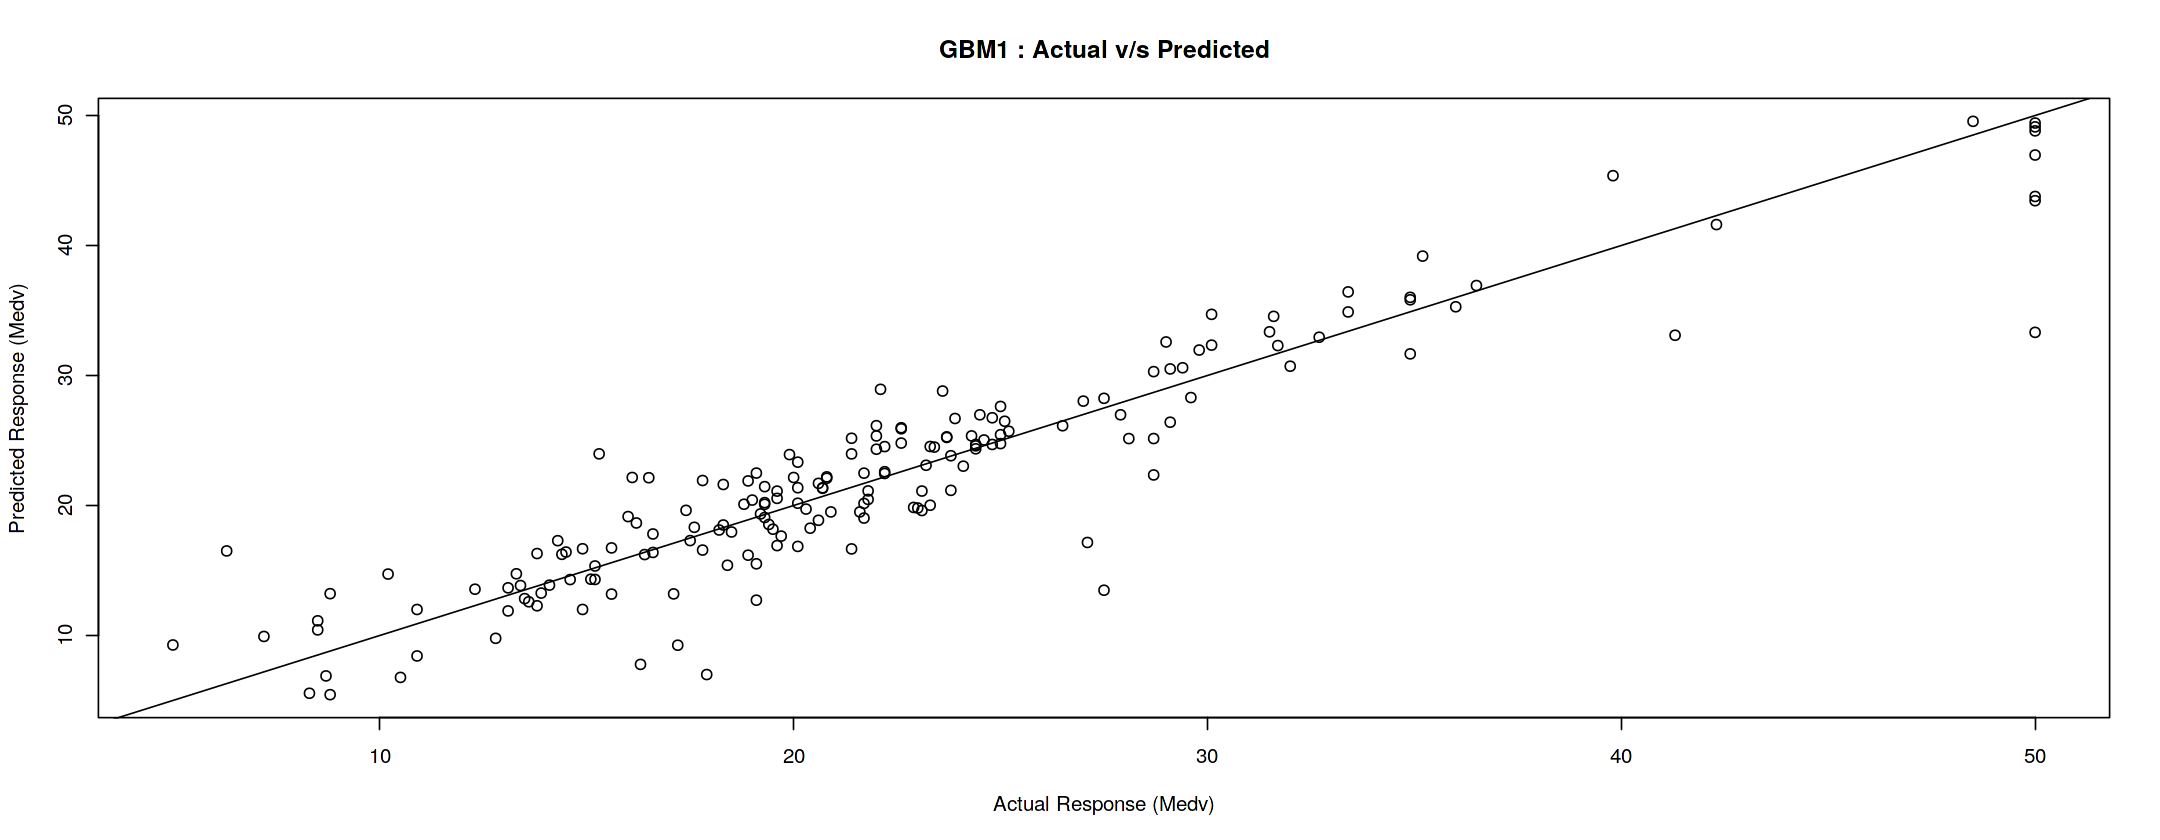

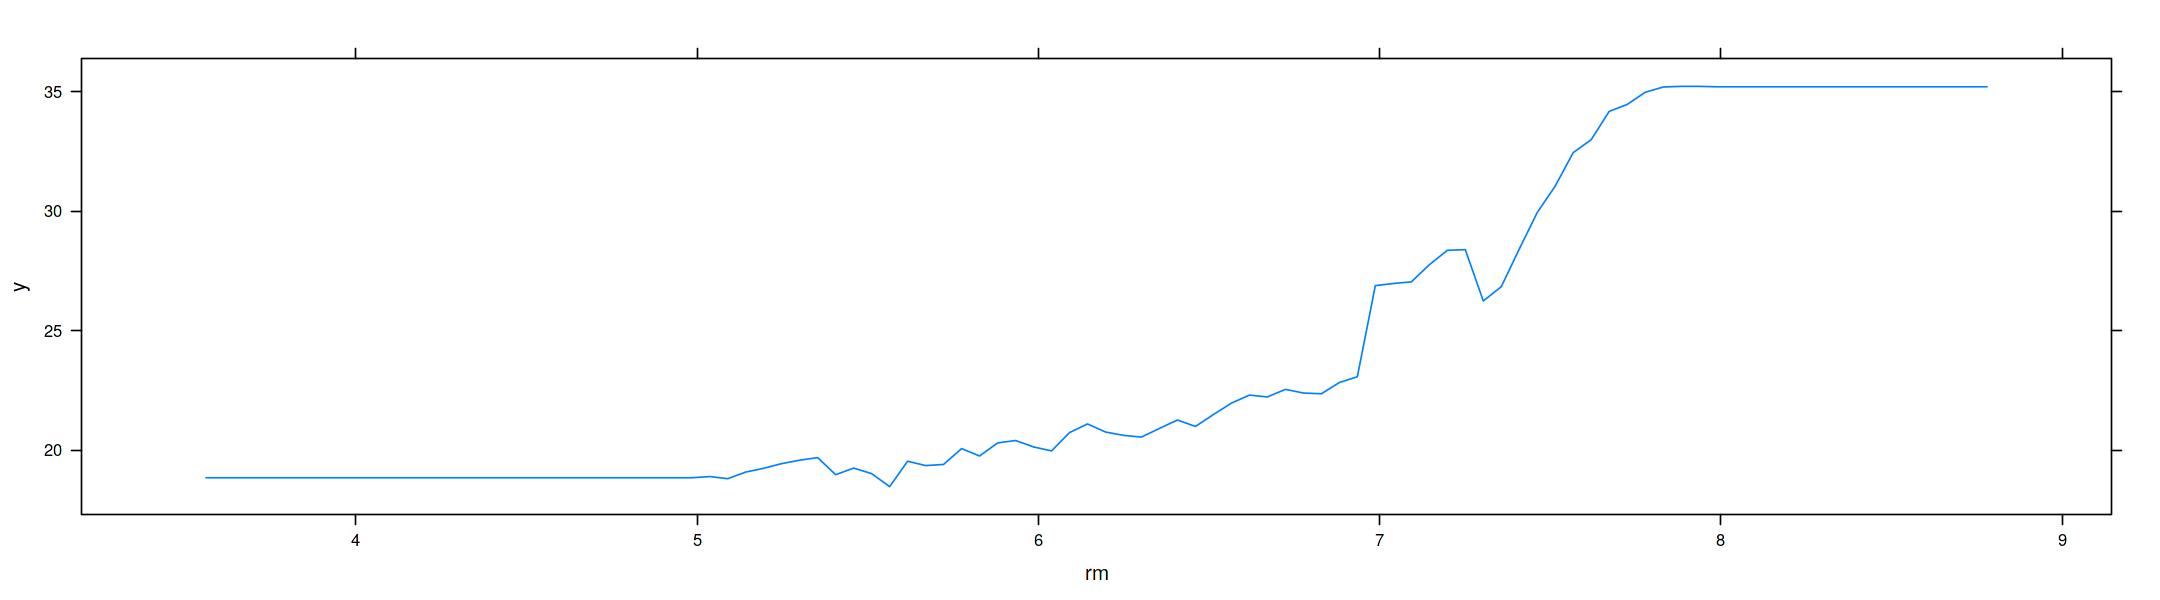

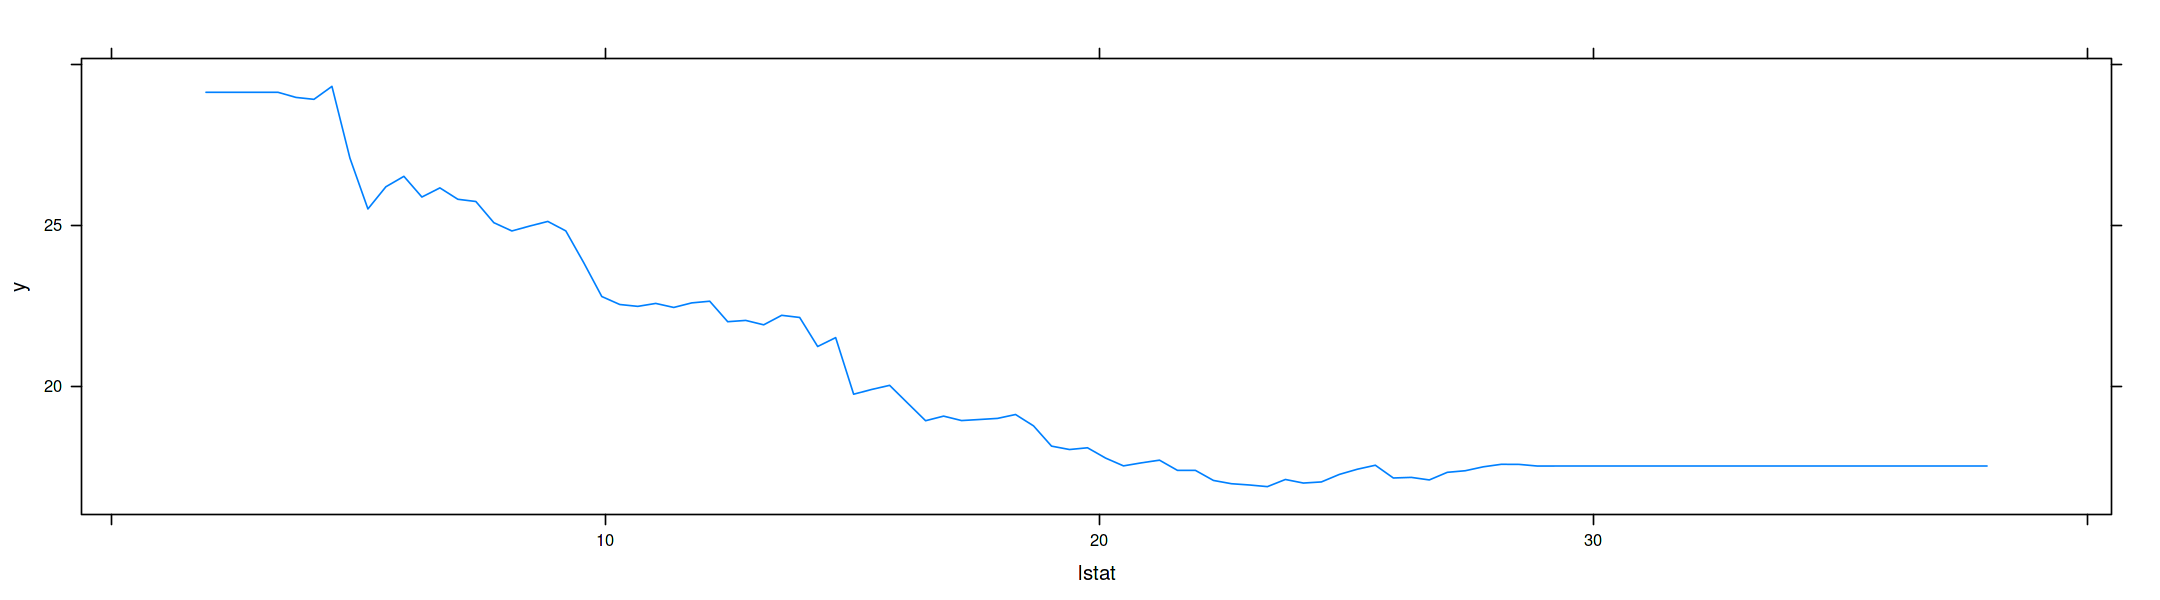

In [156]:
# Resizing the chart area
options(repr.plot.width = 18,repr.plot.height = 7)

# Plotting the fitted response var V/s actual
plot(test_y,test_pred_gbm,xlab = 'Actual Response (Medv)',ylab = 'Predicted Response (Medv)',main = "GBM1 : Actual v/s Predicted")
abline(0,1)

# Plotting the Response variable with some of most relevant features
options(repr.plot.width = 18,repr.plot.height = 5)

# Splitting the Graph Area
plot(model_gbm,i = 'rm')
plot(model_gbm,i = 'lstat')

<i> Therefore, from above charts we might expect, median house prices are increasing with rm ( house size) and decreasing with lstat ( wealth level of the community). </i>

### Let's check, what will happen if tune the shrinkage parameter 

[1] "RMSE on the test data : 3.4268"


,var,rel.inf
,<fct>,<dbl>
lstat,lstat,35.5119567
rm,rm,33.3475125
dis,dis,8.3807716
crim,crim,6.2234806
black,black,3.5233715
ptratio,ptratio,3.1784765
nox,nox,2.8631824
age,age,2.4780321
tax,tax,1.6366720


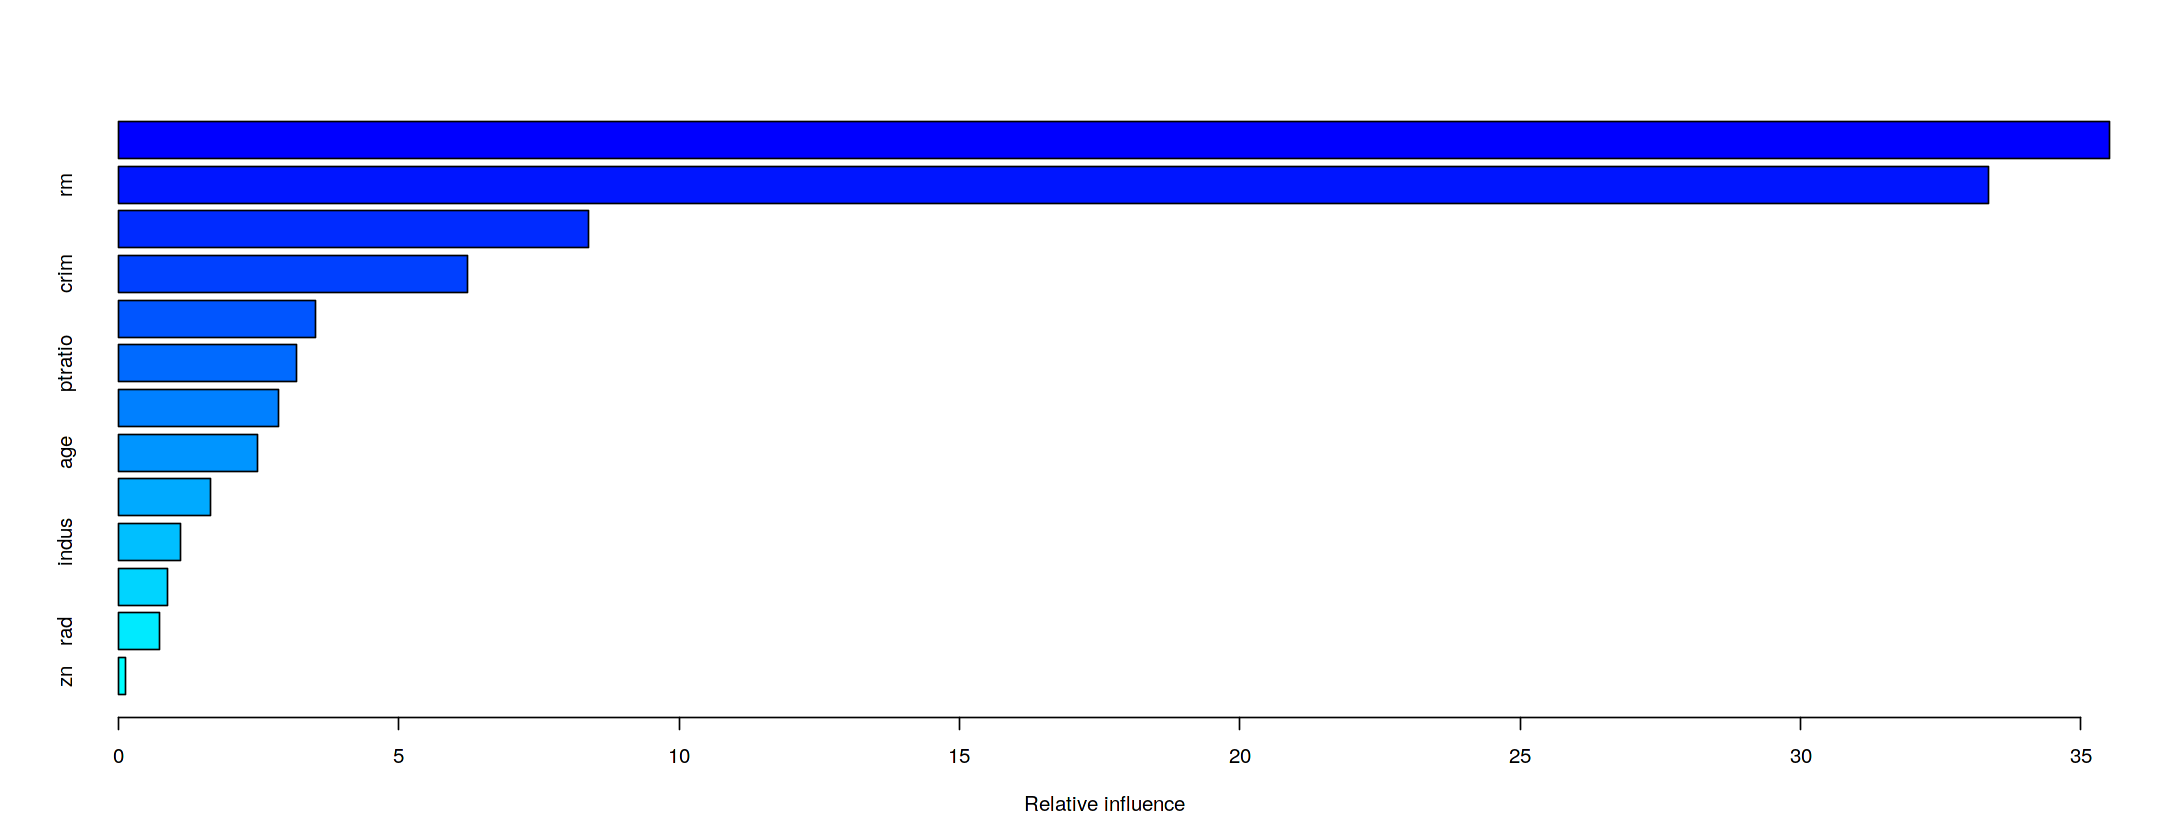

In [157]:
set.seed(1)
# Further Parameters tuning
model_gbm1 = gbm(medv ~., data = train_data, distribution = 'gaussian',
                n.trees = 5000,interaction.depth = 4, shrinkage = 0.015,
                verbose = F)

# Prediction on test data set 
test_pred_gbm1 = predict(model_gbm1,newdata = test_data,n.trees = 5000)

# Model performance on test data set
RMSE_gbm1 = caret::RMSE(test_pred_gbm1,test_y)
print(paste("RMSE on the test data :",round(RMSE_gbm1,4)))

# Features Relative information
options(repr.plot.width = 18,repr.plot.height = 7)
summary(model_gbm1)

### Visualization : For actual v/s predicted response and for some partial dependence plots


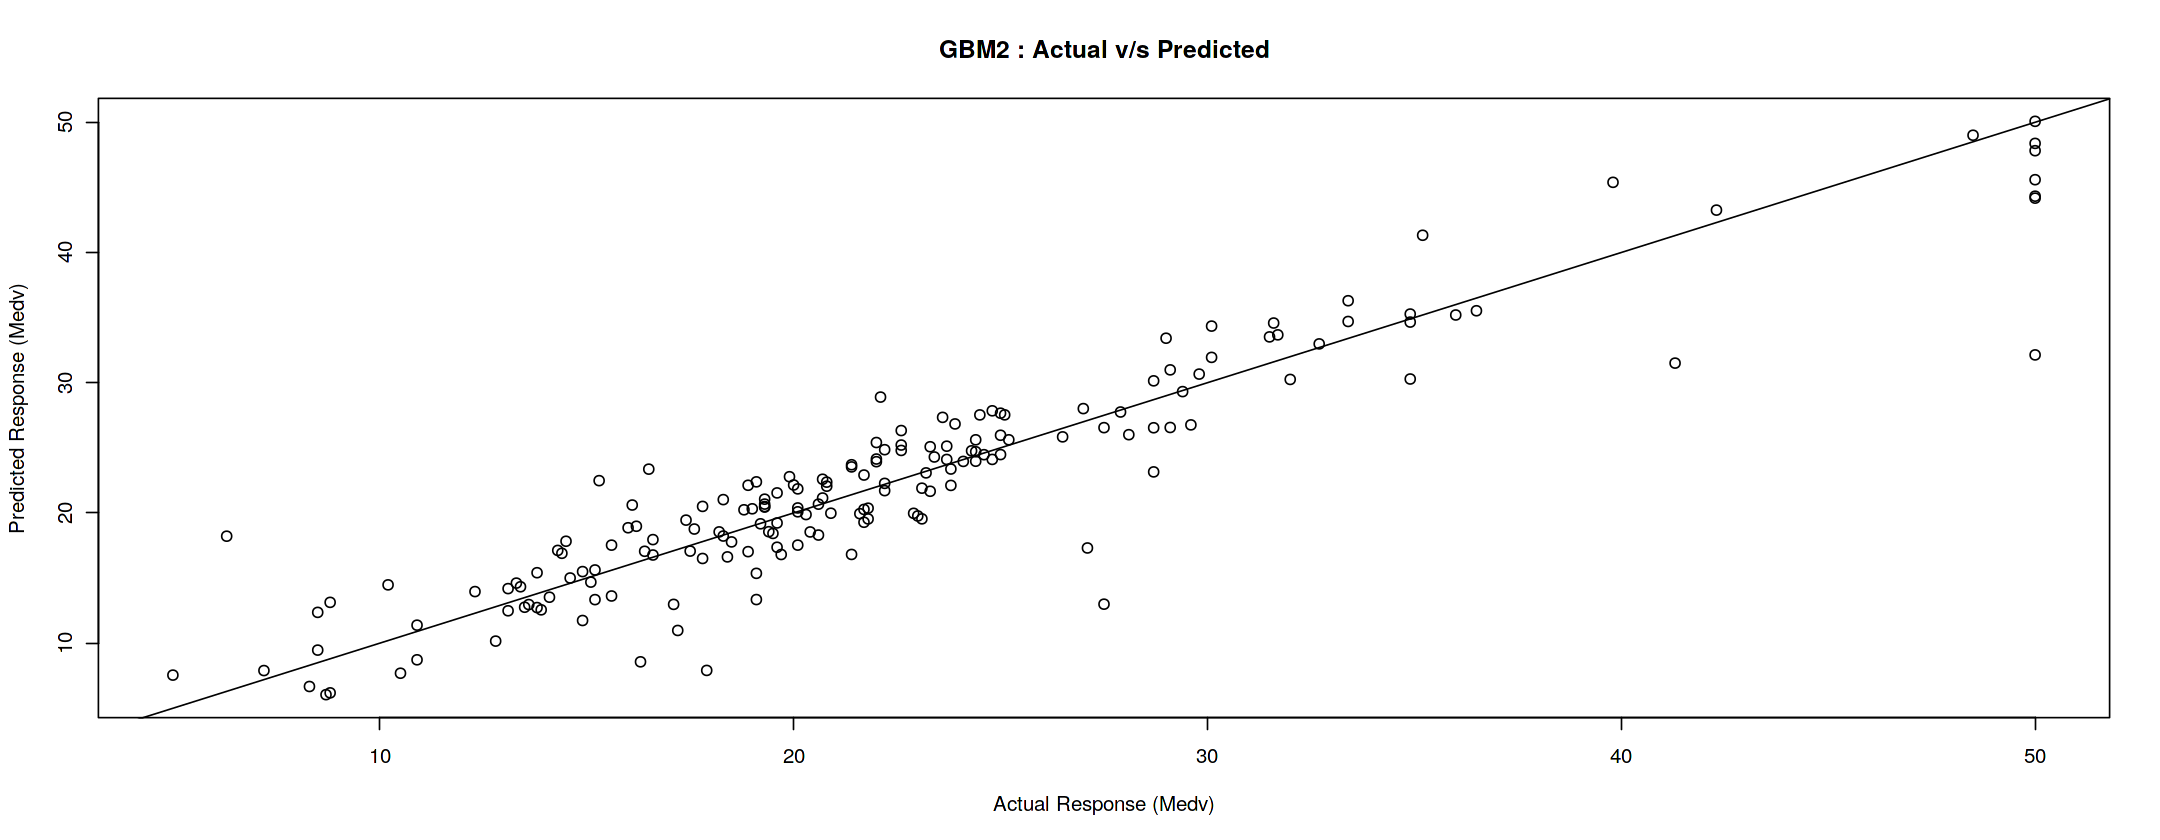

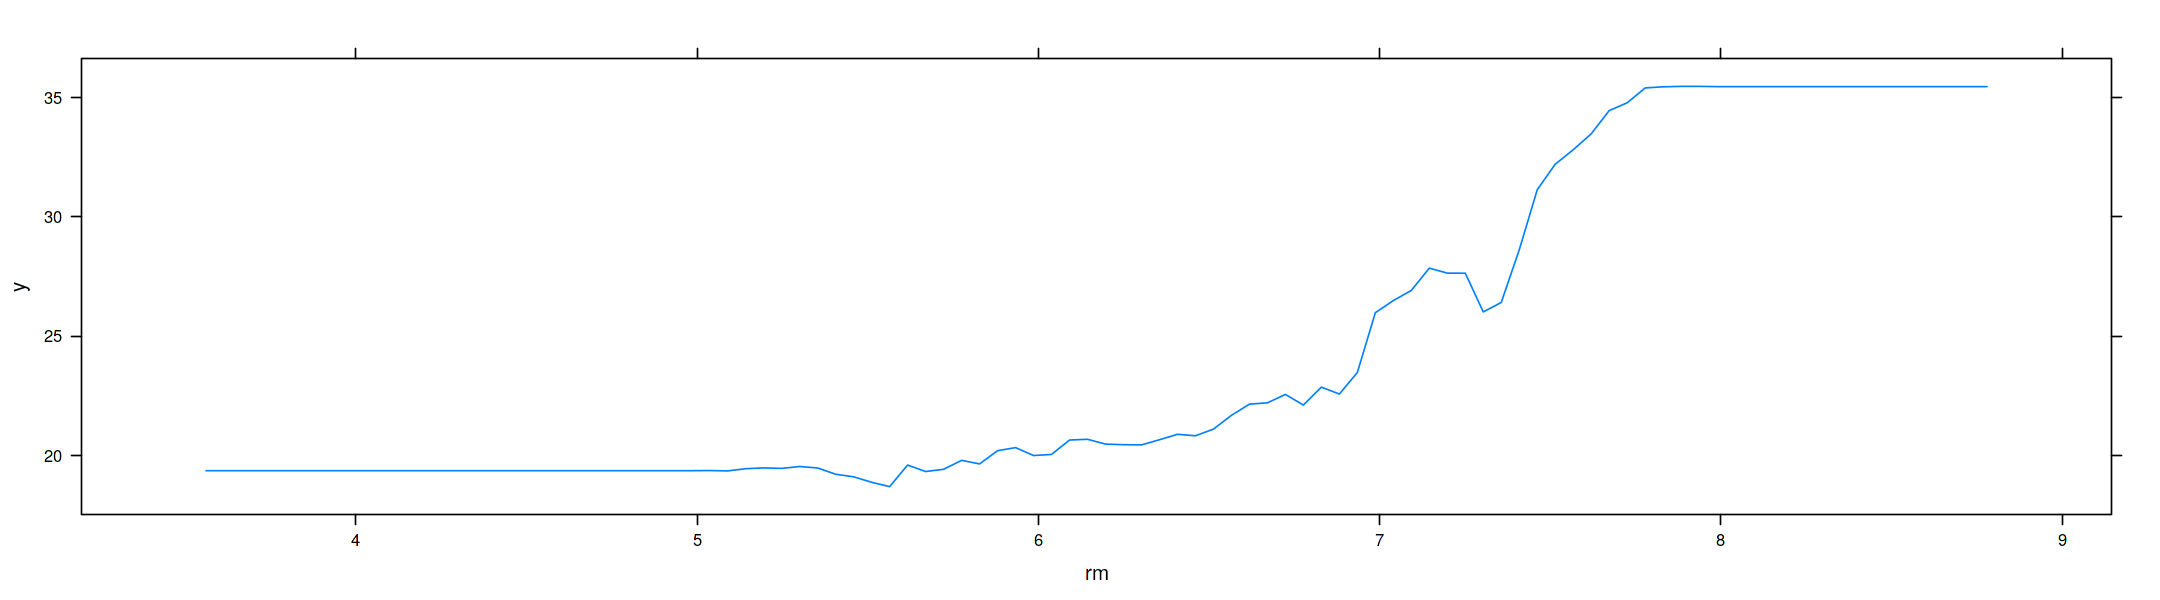

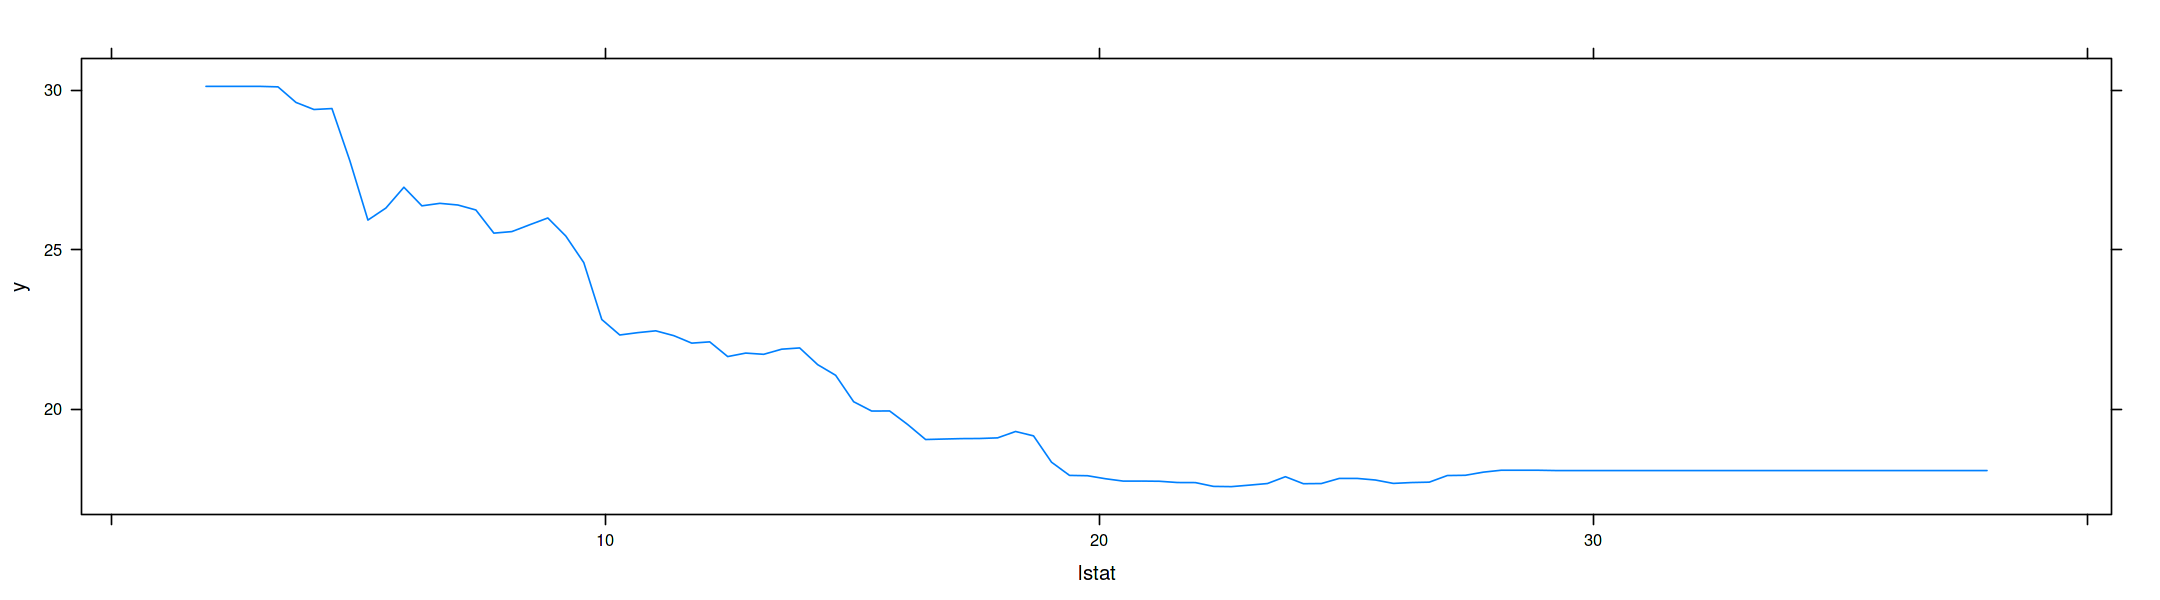

In [158]:
# Resizing the chart area
options(repr.plot.width = 18,repr.plot.height = 7)

# Plotting the fitted response var V/s actual
plot(test_y,test_pred_gbm1,xlab = 'Actual Response (Medv)',ylab = 'Predicted Response (Medv)',main = "GBM2 : Actual v/s Predicted")
abline(0,1)

# Plotting the Response variable with some of most relevant features
options(repr.plot.width = 18,repr.plot.height = 5)

# Splitting the Graph Area
par(mfrow = c(1,2))
plot(model_gbm1,i = 'rm')
plot(model_gbm1,i = 'lstat')

<i> Therefore, if we tune the shrinkage parameter (by default 0.001), it will make some change in model performance and in our case the RMSE on the test data set become lesser, i.e. 3.4268 with srinkage = 0.015,  as compare to previous model. And also the interpretation is same for the features importance and their impact on the respose variable (Median house price) as metioned above.